<a href="https://colab.research.google.com/github/ChesneeMurdock/Ordinary-Differential-Equations/blob/main/Ordinary_Differential_Equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Differential Equations: programming exercises**

## **Instructions:**

Please make a copy of this notebook, and insert cells in the appropriate places with your code.

Note some of the questions ask you to comment on the plots. These questions are important, don't neglect them!

For the questions that require equations, I encourage you to type within the cell rather than inserting an image. If you need help creating Latex equations, this site may be helpful

https://editor.codecogs.com/

----------------------------
## **Packages used:**

* import numpy as np
* import math
* import matplotlib.pyplot as plt
* from scipy.stats import linregress




---



## **__Exercise (1)__**

Consider the simple differential equation

$$\frac{dy}{dx}=1.2y~y(0)=1$$

**(a)**  Solve the equation exactly (pencil and paper).  
_(Note:  you may view the source of this cell to see how an equation is typed within Jupyter notebooks)_


\begin{align}
& \frac{dy}{dx}=1.2(y),~~~~ y(0)=1 & \\
& \frac{dy}{y}=1.2~dx & \\
& \int{\frac{1}{y}}~dy= \int{1.2~dx} & \\
& \ln{|y|}=1.2(x) + C_1 & \\
& y=e^{1.2(x) + C_1} & \\
& y=Ce^{1.2(x)}  & \\
& 1=Ce^{0}, ~~~~ y(0)=1 & \\
& 1 = C & \\
& y=e^{1.2(x)} &
\end{align}


**(b)**  Using Euler's method, compute the solution on the interval of $[0,4]$ with $h=2^{-1},2^{-2}\ldots 2^{-5}$. Make two plots:

(i) plot all solutions and the exact solution on the same graph;

(ii) Plot the log of the absolute errors on the interval $[0.5,4]$ for the five estimates. (We can't include 0 in the interval because that would give 0 error, which has logarithm of $-\infty$.)

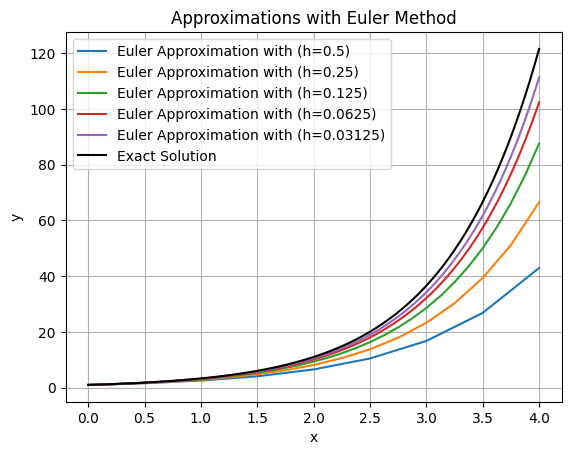

In [ ]:
# Import packages
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Euler's Method
# Parameters
lower_bound = 0
upper_bound = 4
h = np.array([2**-1, 2**-2, 2**-3, 2**-4, 2**-5])
offset = 1e-5

# Functions
def fun(x):
    return np.exp(1.2 * x)

def fprime(x, y):
    return 1.2 * y

def euler(fun, fprime, lower_bound, upper_bound, h):
    num_step = int((upper_bound - lower_bound) / h)
    dx = np.linspace(lower_bound, upper_bound, num=num_step + 1)
    y_euler = np.zeros(num_step + 1)
    y_euler[0] = fun(lower_bound)  # Initial condition
    for i in range(1, num_step + 1):
            y_euler[i] = y_euler[i - 1] + fprime(dx[i - 1], y_euler[i - 1]) * h
    return dx, y_euler

# Plot 1: All solutions and the exact solution on the same graph
plt.figure()
for step_size in h:
    x, y_euler = euler(fun, fprime, lower_bound, upper_bound, step_size)

    # Plotting the result for the current step size
    plt.plot(x, y_euler, label=f'Euler Approximation with (h={step_size})')

x_exact = np.linspace(lower_bound, upper_bound, 1000)
y_exact = fun(x_exact)

# Plot Exact Result:
plt.plot(x_exact, y_exact, label='Exact Solution', color='black')

plt.title('Approximations with Euler Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Slope for step size (h=0.5): 1.6331097073006415
Slope for step size (h=0.25): 1.664754087193989
Slope for step size (h=0.125): 1.6882746175051426
Slope for step size (h=0.0625): 1.702919493897776
Slope for step size (h=0.03125): 1.7111387004857013
Average slope for step size (h=0.5): 1.68003932127665
Average slope for step size (h=0.25): 1.68003932127665
Average slope for step size (h=0.125): 1.68003932127665
Average slope for step size (h=0.0625): 1.68003932127665
Average slope for step size (h=0.03125): 1.68003932127665


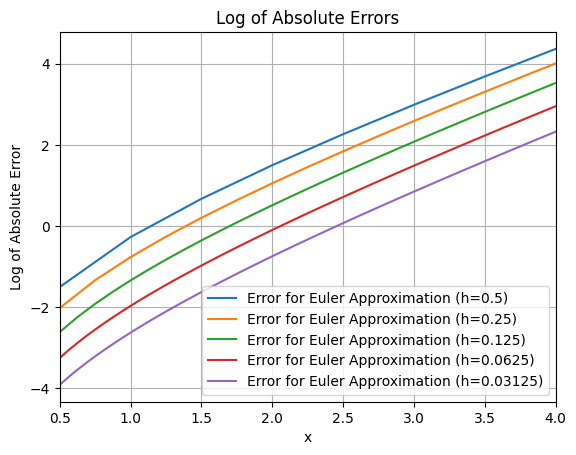

In [ ]:
# Plot 2: Log of the absolute errors on the interval [0.5, 4] for the five estimates
plt.figure()
slopes = []  # List to store slopes for each step size

for step_size in h:
    x, y_euler = euler(fun, fprime, lower_bound, upper_bound, step_size)
    select = (x >= 0.5)
    err = np.abs(fun(x) - y_euler)
    log_error = np.log(err[select])

    # Perform linear regression
    slope, intercept, _, _, _ = linregress(x[select], log_error)
    slopes.append(slope)

# Print slopes for each step size
for i, step_size in enumerate(h):
    print(f"Slope for step size (h={step_size}): {slopes[i]}")

# Calculate the average slope for each step size
average_slopes = np.mean(slopes)

# Print the average slope for each step size
for i, step_size in enumerate(h):
    print(f"Average slope for step size (h={step_size}): {average_slopes}")

for step_size in h:
    x, y_euler = euler(fun, fprime, lower_bound, upper_bound, step_size)
    select = (x >= 0.5)
    err = np.abs(fun(x) - y_euler)
    log_error = np.log(err[select])

    # Plotting the result for the current step size
    plt.plot(x[select], log_error, label=f'Error for Euler Approximation (h={step_size})')

plt.title('Log of Absolute Errors')
plt.xlabel('x')
plt.ylabel('Log of Absolute Error')
plt.xlim(0.5, 4)  # Restricting viewing window to exclude log(0)
plt.legend()
plt.grid(True)
plt.show()

**(c)**  What do your graphs show about the error for the Euler method? Specifically, how does the error vary with $x$? And how does the error vary with $h$? Answer as specifically as you can.    

-------------------------------------

**First plot:**
Shows the solutions  and exact solutions when applying the Euler method for different step sizes and observing how the error varies with x on the interval [0,4]. As x increases and when the step size is larger, the exponential function increases and the error begins to increase, resulting in larger discrepancies between the approximate and exact solutions.The smaller the step size, the better the approximation to the exact solution.

**Second Plot:**
Shows the logarithm of the absolute error as a function of x for different step sizes and examining how the error changes with the step size h on the interval [0.5,4]. It appears that each slope stays approximately proportional to one another other from [1.5 , 4].

-------------------------------------

**Can you give mathematical equations for the dependence of the error on $x$ and on $h$?**

\begin{align}
&Since~ y=log(|error|),~and~x=log(\Delta x),~~then& \\
&y = mx + b& \\
&log(|error|) = log(\Delta x) + log(b)& \\
&|error|= me^{log(\Delta x+b)}& \\
&|error|=1.68x+{\frac{e^{b}}{n^2}}& \\
\end{align}




**(d)** Repeat b. and c. for Runge-Kutta 2nd Order Method. You must code the methods yourself. Do NOT use the pre-build routines from numpy or scipy (or any other existing library.)

Use Heun's method for all of your Runge-Kutta solutions. However, you should write your code so that it can easily be converted to midpoint or Ralston's method.





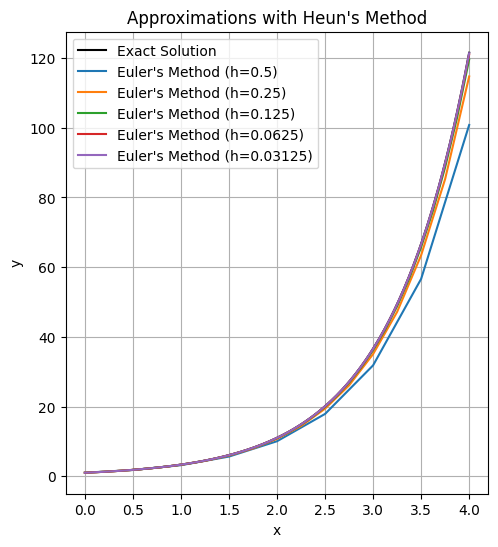

In [ ]:
# This code will calculate and print the slope of the log of the absolute errors
# for Heun's Method approximations with different step sizes (h).

# Each slope represents how fast the error decreases or increases with respect
# to the step size used in the Heun's Method approximation.

def euler_method(func, y0, h, steps):

    x_val = [0]  # Initial x value
    y_val = [y0]  # Initial y value

    for i in range(steps):
        x = x_val[-1]
        y = y_val[-1]

        k1 = func(x, y)
        k2 = func(x + h, y + h * k1)

        x_val.append(x + h)
        y_val.append(y + 0.5 * h * (k1 + k2))

    return x_val, y_val

# Define the differential equation dy/dx = 1.2y
def diff_eq(x, y):
    return 1.2 * y

# Exact solution of the differential equation y = e^(1.2x)
def exact_solution(x):
    return math.exp(1.2 * x)

# Compute approximate solutions for different step sizes using Euler's method
h_values = [2**(-i) for i in range(1, 6)]
exact_x_vals = [0.5 + i * 0.01 for i in range(351)]  # Generate x values from 0.5 to 4
exact_y_vals = [exact_solution(x) for x in exact_x_vals]

# Plot 1: All solutions and the exact solution on the same graph using Heun's method
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(exact_x_vals, exact_y_vals, label='Exact Solution', color='black')

for h in h_values:
    x_vals, y_vals = euler_method(diff_eq, 1, h, int(4/h))
    plt.plot(x_vals, y_vals, label=f'Euler\'s Method (h={h})')

plt.title('Approximations with Heun\'s Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

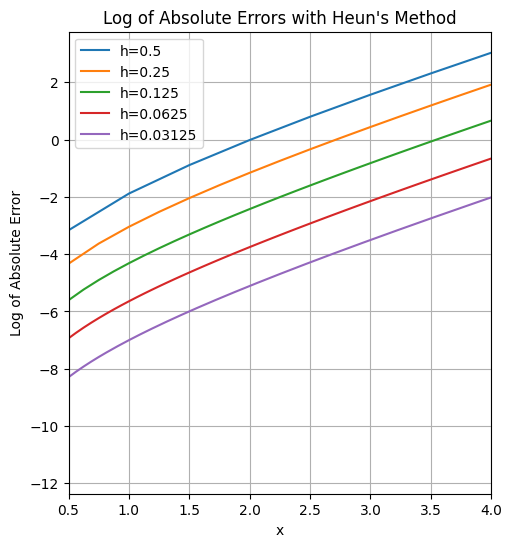

In [ ]:
# Plot 2
# Plot log of absolute errors for the five estimates
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 2)
for h in h_values:
    x_vals, y_vals = euler_method(diff_eq, 1, h, int(4/h))
    exact_y = [exact_solution(x) for x in x_vals]
    abs_error = [abs(y - exact_y[i]) for i, y in enumerate(y_vals)]
    log_error = [0 if error == 0 else math.log(error) for error in abs_error[1:]]  # Exclude the first point to avoid log(0)
    plt.plot(x_vals[1:], log_error, label=f'h={h}')

plt.title('Log of Absolute Errors with Heun\'s Method')
plt.xlabel('x')
plt.ylabel('Log of Absolute Error')
plt.xlim(0.5, 4)  # Restricting viewing window to exclude log(0)
plt.legend()
plt.grid(True)
plt.show()

**(e)**  What do your graphs show about the error for Runge-Kutte 2nd Order Method? Specifically, how does the error vary with $x$? And how does the error vary with $h$? Answer as specifically as you can.

----------------------------------------

**First plot:**
As x increases and when the step size is larger, the error does increase around x=3, resulting in larger discrepancies between the approximate and exact solutions.This is seen more so for step size h=0.5 and h=0.25. The smaller the step size, the approximation appears to mimic the exact solution.

**Second Plot:**
For smaller values of h there are lower errors. As the step size decreases, the exponental function increases. All the step sizes increase but the smaller the step sizes increases from a very small y value to a still small y value. The larger step sizes increase proportionally to the smaller step size, but the larger step size increases from a small y value to a larger y value. The average slope for the step-sizes is approximately 1.73. It appears that each slope stays approximately proportional to one another other from [1.5 , 4].

-------------------------------------

**Can you give mathematical equations for the dependence of the error on $x$ and on $h$?**   

\begin{align}
&Since~ y=log(|error|),~ x=log(\Delta x),& \\
&then& \\
&y = mx + b& \\
&log(|error|) = log(\Delta x) + log(b)& \\
&|error|= me^{log(\Delta x+b)}& \\
&|error|=1.73x+{\frac{e^{b}}{n^2}}& \\
\end{align}


**(f)**  Repeat b. and c. for Runge-Kutta 4th Order Method. _You must code the methods yourself.  Do NOT use the pre-build routines from `numpy` or `scipy` (or any other existing library)._



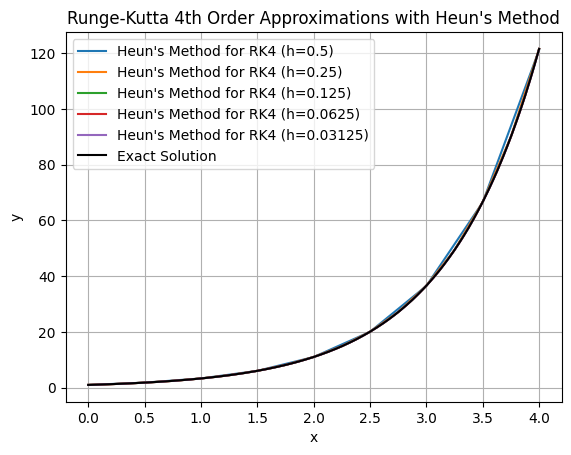

In [ ]:
# Runge-Kutta 4th Order Method using Heun's Method
def runge_kutta_4(fun, fprime, lower_bound, upper_bound, h):
    # Using Runge-Kutta 4th Order Method
    num_steps = int((upper_bound - lower_bound) / h)
    x_values = np.linspace(lower_bound, upper_bound, num=num_steps + 1)
    y_rk4 = np.zeros(num_steps + 1)
    y_rk4[0] = fun(lower_bound)  # Initial condition

    for i in range(1, num_steps + 1):
        k1 = fprime(x_values[i - 1], y_rk4[i - 1])
        k2 = fprime(x_values[i - 1] + 0.5 * h, y_rk4[i - 1] + 0.5 * k1 * h)
        k3 = fprime(x_values[i - 1] + 0.5 * h, y_rk4[i - 1] + 0.5 * k2 * h)
        k4 = fprime(x_values[i - 1] + h, y_rk4[i - 1] + k3 * h)
        y_rk4[i] = y_rk4[i - 1] + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4) * h

    return x_values, y_rk4

# Plot 1: All solutions and the exact solution on the same graph using Heun's method for Runge-Kutta 4th Order
plt.figure()
h_values = [2**(-i) for i in range(1, 6)]  # Define h_values before the loop

for step_size in h_values:
    x_heun, y_heun = runge_kutta_4(fun, fprime, lower_bound, upper_bound, step_size)

    # Plotting the result for the current step size
    plt.plot(x_heun, y_heun, label=f'Heun\'s Method for RK4 (h={step_size})')

# Plot Exact Result:
plt.plot(x_exact, y_exact, label='Exact Solution', color='black')

plt.title('Runge-Kutta 4th Order Approximations with Heun\'s Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Slope for Runge-Kutta 4th Order Method with Heun's Method and step size (h=0.5): 1.7472963165485862
Slope for Runge-Kutta 4th Order Method with Heun's Method and step size (h=0.25): 1.7069322424837905
Slope for Runge-Kutta 4th Order Method with Heun's Method and step size (h=0.125): 1.4821616795022816
Slope for Runge-Kutta 4th Order Method with Heun's Method and step size (h=0.0625): 0.7880480334221186
Slope for Runge-Kutta 4th Order Method with Heun's Method and step size (h=0.03125): 0.1539072813931628
Average slope for Runge-Kutta 4th Order Method with Heun's Method and step size (h=0.5): 1.175669110669988
Average slope for Runge-Kutta 4th Order Method with Heun's Method and step size (h=0.25): 1.175669110669988
Average slope for Runge-Kutta 4th Order Method with Heun's Method and step size (h=0.125): 1.175669110669988
Average slope for Runge-Kutta 4th Order Method with Heun's Method and step size (h=0.0625): 1.175669110669988
Average slope for Runge-Kutta 4th Order Method with Heun

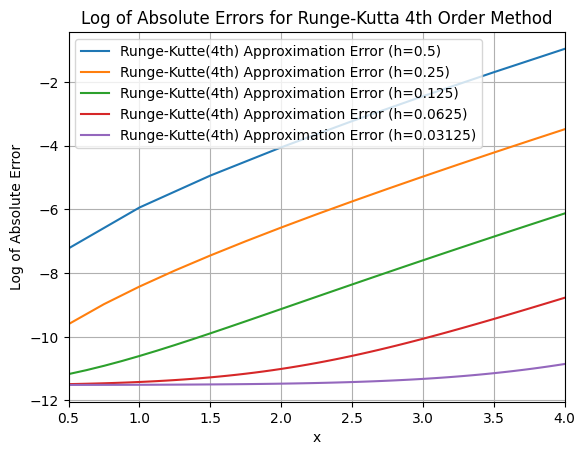

In [ ]:
# Plot 2: Log of the absolute errors on the interval [0.5, 4] for the five estimates using Heun's method for Runge-Kutta 4th Order
plt.figure()

# Calculate slopes for Runge-Kutta 4th Order Method using Heun's Method
slopes_rk4_heun = []

for step_size in h_values:
    x_rk4, y_rk4 = runge_kutta_4(fun, fprime, lower_bound, upper_bound, step_size)
    select = (x_rk4 >= 0.5)
    err_rk4 = np.abs(fun(x_rk4) - y_rk4)
    log_error_rk4 = np.log(err_rk4 + offset)  # Modify error calculation here

    # Perform linear regression
    slope, intercept, _, _, _ = linregress(x_rk4[select], log_error_rk4[select])
    slopes_rk4_heun.append(slope)

# Print slopes for Runge-Kutta 4th Order Method using Heun's Method
for i, step_size in enumerate(h_values):
    print(f"Slope for Runge-Kutta 4th Order Method with Heun's Method and step size (h={step_size}): {slopes_rk4_heun[i]}")

# Calculate the average slope for each step size
average_slopes_rk4_heun = np.mean(slopes_rk4_heun)

# Print the average slope for each step size
for i, step_size in enumerate(h_values):
    print(f"Average slope for Runge-Kutta 4th Order Method with Heun's Method and step size (h={step_size}): {average_slopes_rk4_heun}")

for step_size in h_values:
    x_rk4, y_rk4 = runge_kutta_4(fun, fprime, lower_bound, upper_bound, step_size)
    select = (x_rk4 >= 0.5)
    err_rk4 = np.abs(fun(x_rk4) - y_rk4)
    log_error_rk4 = np.log(err_rk4 + offset)  # Modify error calculation here

    # Plotting the result for the current step size
    plt.plot(x_rk4[select], log_error_rk4[select], label=f'Runge-Kutte(4th) Approximation Error (h={step_size})')

plt.xlim(0.5, 4)  # Restricting viewing window to exclude log(0)
plt.xlabel('x')
plt.ylabel('Log of Absolute Error')
plt.title('Log of Absolute Errors for Runge-Kutta 4th Order Method')
plt.legend()
plt.grid(True)
plt.show()

**(g)**  What do your graphs show about the error for Runge-Kutte 4th Order Method? Specifically, how does the error vary with $x$? And how does the error vary with $h$? Answer as specifically as you can.

-----------------------------------

**First plot:**
As x increases and when the step size is larger, the error does increase around x=3.5, resulting in larger discrepancies between the approximate and exact solutions.This is seen more so for step size h=0.5 and h=0.25. The smaller the step size, the approximation appears to mimic the exact solution.

**Second Plot:**
For smaller values of h there are lower errors. As the step size decreases, the exponental function increases but not as quickly. The smaller the step size increases but very little. This shows that there is very little error when the step size is smaller. The slopes of all five lines do not all stay proportional to one another. The only slopes that remain parallel are step sizes of h=0.5, 0.25, and 0.125 on the interval [1.0, 4.0].  

-------------------------------------

**Can you give mathematical equations for the dependence of the error on $x$ and on $h$?**   

\begin{align}
&Since~ y=log(|error|),~ x=log(\Delta x),& \\
&then& \\
&y = mx + b& \\
&log(|error|) = log(\Delta x) + log(b)& \\
&|error|= me^{log(\Delta x+b)}& \\
&|error|=1.18x+{\frac{e^{b}}{n^2}}& \\
\end{align}

**(h)** Plot the log of the absolute error of the estimate of $y(4)$ versus log of $h$ for all three methods (on the same axes).

Use the same values of $h$ as above.

Add title, legend, axes labels as above.

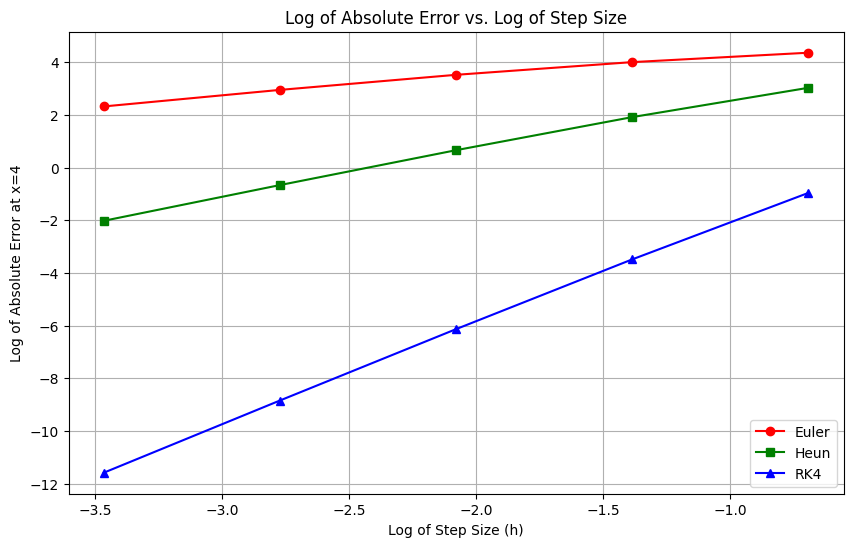

In [ ]:
# Log of the absolute error of the estimate of y(4) versus log of h
# Define the Euler method
def euler_method(func, y0, h, steps):
    # Implementation of Euler's method
    x_vals = [0]  # Initial x value
    y_vals = [y0]  # Initial y value

    for i in range(steps):
        x = x_vals[-1]
        y = y_vals[-1]

        dydx = func(x, y)
        y_next = y + dydx * h

        x_vals.append(x + h)
        y_vals.append(y_next)

    return x_vals, y_vals

# Define the Heun method (improved Euler's method)
def heun_method(func, y0, h, steps):
    # Implementation of Heun's method
    x_vals = [0]  # Initial x value
    y_vals = [y0]  # Initial y value

    for i in range(steps):
        x = x_vals[-1]
        y = y_vals[-1]

        k1 = func(x, y)
        k2 = func(x + h, y + h * k1)

        x_vals.append(x + h)
        y_vals.append(y + 0.5 * h * (k1 + k2))

    return x_vals, y_vals

# Define the Runge-Kutta 4th Order method
def runge_kutta_4(func, y0, h, steps):
    # Implementation of Runge-Kutta 4th Order method
    x_vals = [0]  # Initial x value
    y_vals = [y0]  # Initial y value

    for i in range(steps):
        x = x_vals[-1]
        y = y_vals[-1]

        k1 = func(x, y)
        k2 = func(x + 0.5 * h, y + 0.5 * h * k1)
        k3 = func(x + 0.5 * h, y + 0.5 * h * k2)
        k4 = func(x + h, y + h * k3)

        x_vals.append(x + h)
        y_vals.append(y + (h / 6) * (k1 + 2*k2 + 2*k3 + k4))

    return x_vals, y_vals

# Define the differential equation dy/dx = 1.2y
def diff_eq(x, y):
    return 1.2 * y

# Exact solution of the differential equation y = e^(1.2x)
def exact_solution(x):
    return math.exp(1.2 * x)

# Compute exact solution and generate h_values
exact_x_vals = [0.5 + i * 0.01 for i in range(351)]
exact_y_vals = [exact_solution(x) for x in exact_x_vals]
h_values = [2**(-i) for i in range(1, 6)]

# Initialize lists to store errors
log_h_values = []
euler_errors = []
heun_errors = []
rk4_errors = []

# Iterate over each step size
for h in h_values:
    log_h_values.append(math.log(h))

    # Compute approximations and errors for Euler's method
    _, y_euler = euler_method(diff_eq, 1, h, int(4 / h))
    euler_error = abs(y_euler[-1] - exact_solution(4))
    euler_errors.append(math.log(euler_error))

    # Compute approximations and errors for Heun's method
    _, y_heun = heun_method(diff_eq, 1, h, int(4 / h))
    heun_error = abs(y_heun[-1] - exact_solution(4))
    heun_errors.append(math.log(heun_error))

    # Compute approximations and errors for Runge-Kutta 4th Order method
    _, y_rk4 = runge_kutta_4(diff_eq, 1, h, int(4 / h))
    rk4_error = abs(y_rk4[-1] - exact_solution(4))
    rk4_errors.append(math.log(rk4_error))

# Plot the results
plt.figure(figsize=(10, 6))

# Plot log of absolute errors for all three methods
plt.plot(log_h_values, euler_errors, label='Euler', color='red', marker='o')
plt.plot(log_h_values, heun_errors, label='Heun', color='green', marker='s')
plt.plot(log_h_values, rk4_errors, label='RK4', color='blue', marker='^')

plt.xlabel('Log of Step Size (h)')
plt.ylabel('Log of Absolute Error at x=4')
plt.title('Log of Absolute Error vs. Log of Step Size')
plt.legend()
plt.grid(True)
plt.show()

**(i)** Comment on the plot that you created in h.  Specifically, what does the plot tell you about the dependence of the error on $x$ and on $h$ for the three methods? (If possible, give equations.)

-------------------------------

At x=4, we see the step sizes are decreasing along with the absolute error for all methods. For the Euler method, we see that the error on $x$ for step size $h$ is linear (h). For the RK2 method, we see that the error on $x$ for step size $h$ is squared (h^2). And for the RK4 method, we see that the error on $x$ for step size $h$ is quartic (h^4).

---

__Exercise (2)__

Using the Euler method, estimate the solution to the second-order differential equation:
$$\frac{d^2y}{dx^2}+2\frac{dy}{dx}+5y=0.$$
with $y(0)=4$  and $\frac{dy}{dx}(0)=0.$
Use a step size of $h=0.1$ and plot on the interval $[0,10]$.

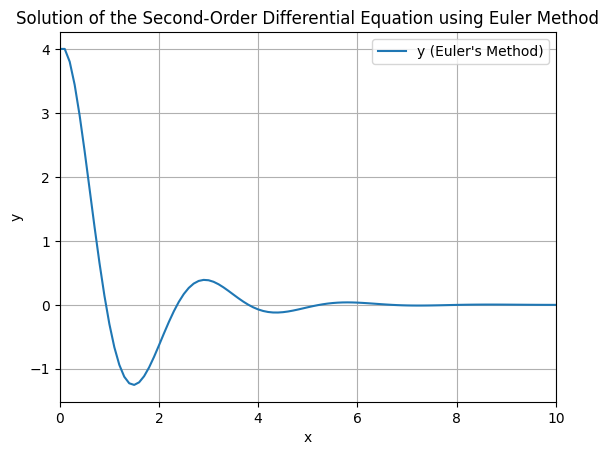

In [ ]:
# Define parameters
step_size = 0.1
lower_bound = 0
upper_bound = 10

# Define differential equations
def dy_dx(x, y, z):
    return z

def dz_dx(x, y, z):
    return -2 * z - 5 * y

# Implement Euler's method for second-order differential equations
def euler_second_order(dy_dx, dz_dx, lower_bound, upper_bound, step_size):
    num_steps = int((upper_bound - lower_bound) / step_size)
    x_values = np.linspace(lower_bound, upper_bound, num=num_steps + 1)
    y_values = np.zeros(num_steps + 1)
    y_values[0] = 4  # Initial condition for y
    z_values = np.zeros(num_steps + 1)
    z_values[0] = 0  # Initial condition for y'

    for i in range(1, num_steps + 1):
        y_values[i] = y_values[i - 1] + dy_dx(x_values[i - 1], y_values[i - 1], z_values[i - 1]) * step_size
        z_values[i] = z_values[i - 1] + dz_dx(x_values[i - 1], y_values[i - 1], z_values[i - 1]) * step_size

    return x_values, y_values

# Solve the second-order differential equation using Euler's method
x_values, y_values = euler_second_order(dy_dx, dz_dx, lower_bound, upper_bound, step_size)

# Plot the solution
plt.plot(x_values, y_values, label="y (Euler's Method)")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 10)
plt.title('Solution of the Second-Order Differential Equation using Euler Method')
plt.grid(True)
plt.show()